<a href="https://colab.research.google.com/github/A24bhi/task/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/sample_data/Covid_19_Clean_Complete (2) (1).csv',parse_dates = ['Date'])

In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
#Renaming Columns
df.rename(columns = {'Date':'date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [ ]:
df.drop(['Lat','Long'],axis=1,inplace= True)

In [ ]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [ ]:
#To Find the Data on Specific Date
world = df[df['date']=='2020-07-27']
world

,State,Country,date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
world = world.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
world

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
figure = px.choropleth(world,locations='Country',locationmode='country names',hover_name='Country',color = 'Active',range_color=[1,10000],color_continuous_scale='blues',title='Countries with Active Cases')
figure.show()

In [ ]:
figure = px.choropleth(world,locations='Country',locationmode='country names',hover_name='Country',color = 'Deaths',range_color=[1,10000],color_continuous_scale='rdgy',title='Countries with Deaths Cases')
figure.show()

In [ ]:
figure = px.choropleth(world,locations='Country',locationmode='country names',hover_name='Country',color = 'Confirmed',range_color=[1,10000],color_continuous_scale='oranges',title='Countries with Confirmed Cases')
figure.show()

In [ ]:
figure = px.choropleth(world,locations='Country',locationmode='country names',hover_name='Country',color = 'Recovered',range_color=[1,10000],color_continuous_scale='greens',title='Countries with Recovered Cases')
figure.show()

In [ ]:
#Trend of Active Cases in the World
total_Active_cases = df.groupby('date').sum().reset_index()[['date','Active']]
total_Active_cases

,date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [ ]:
total_Death_cases = df.groupby('date').sum().reset_index()[['date','Deaths']]
total_Death_cases

,date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
total_Confirmed_cases = df.groupby('date').sum().reset_index()[['date','Confirmed']]
total_Confirmed_cases

,date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
total_Recovered_cases = df.groupby('date').sum().reset_index()[['date','Recovered']]
total_Recovered_cases

,date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


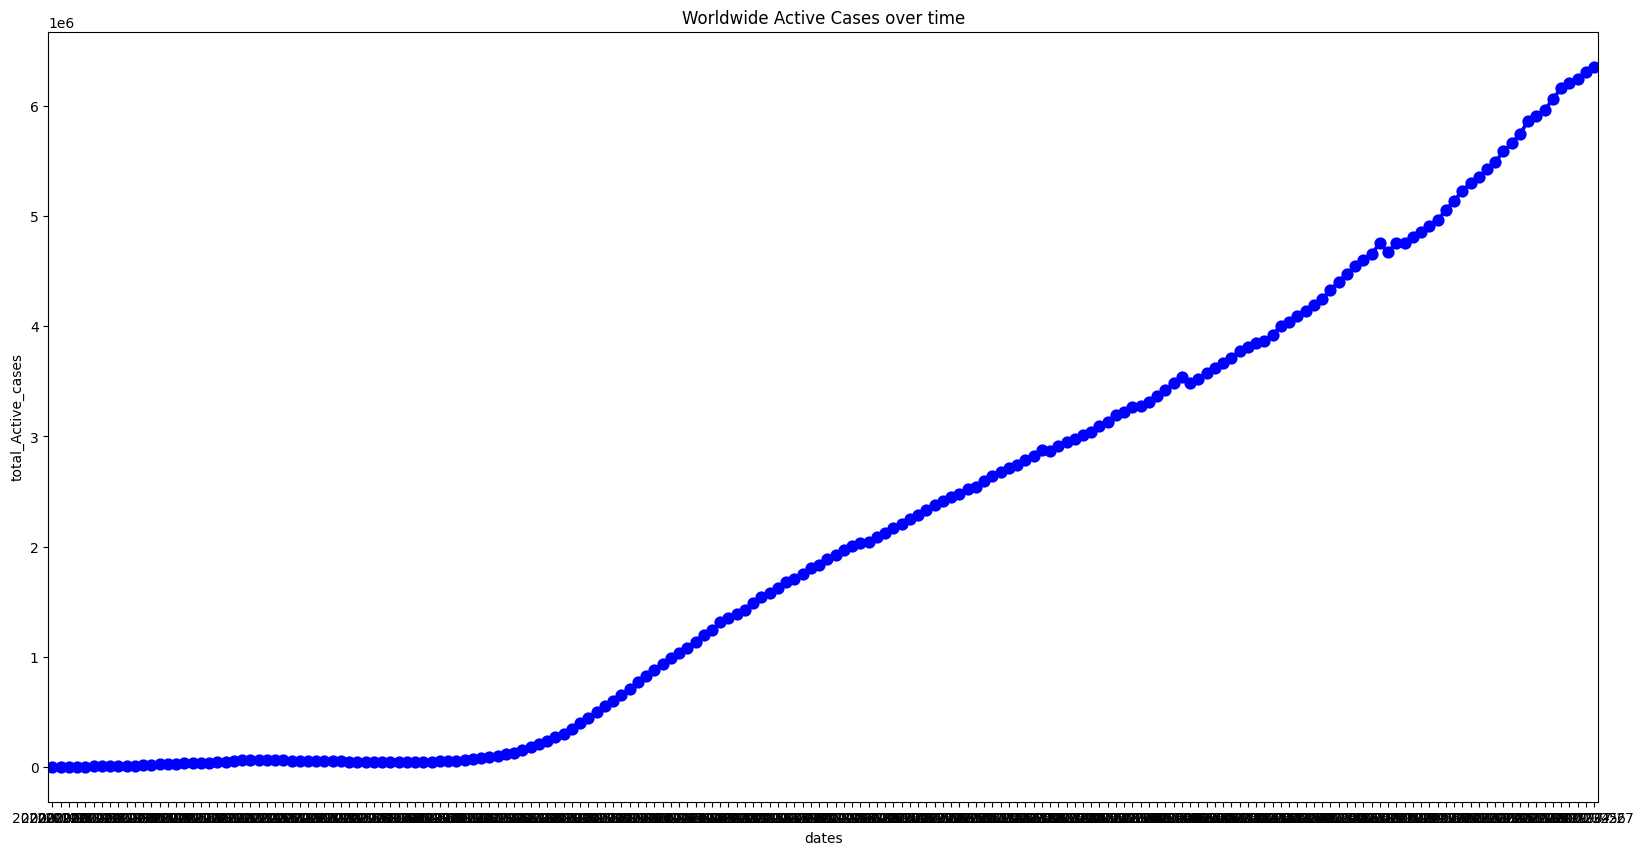

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('dates')
plt.ylabel('total_Active_cases')
plt.title('Worldwide Active Cases over time')
ax = sns.pointplot(x = total_Active_cases.date,y=total_Active_cases.Active,color='b')

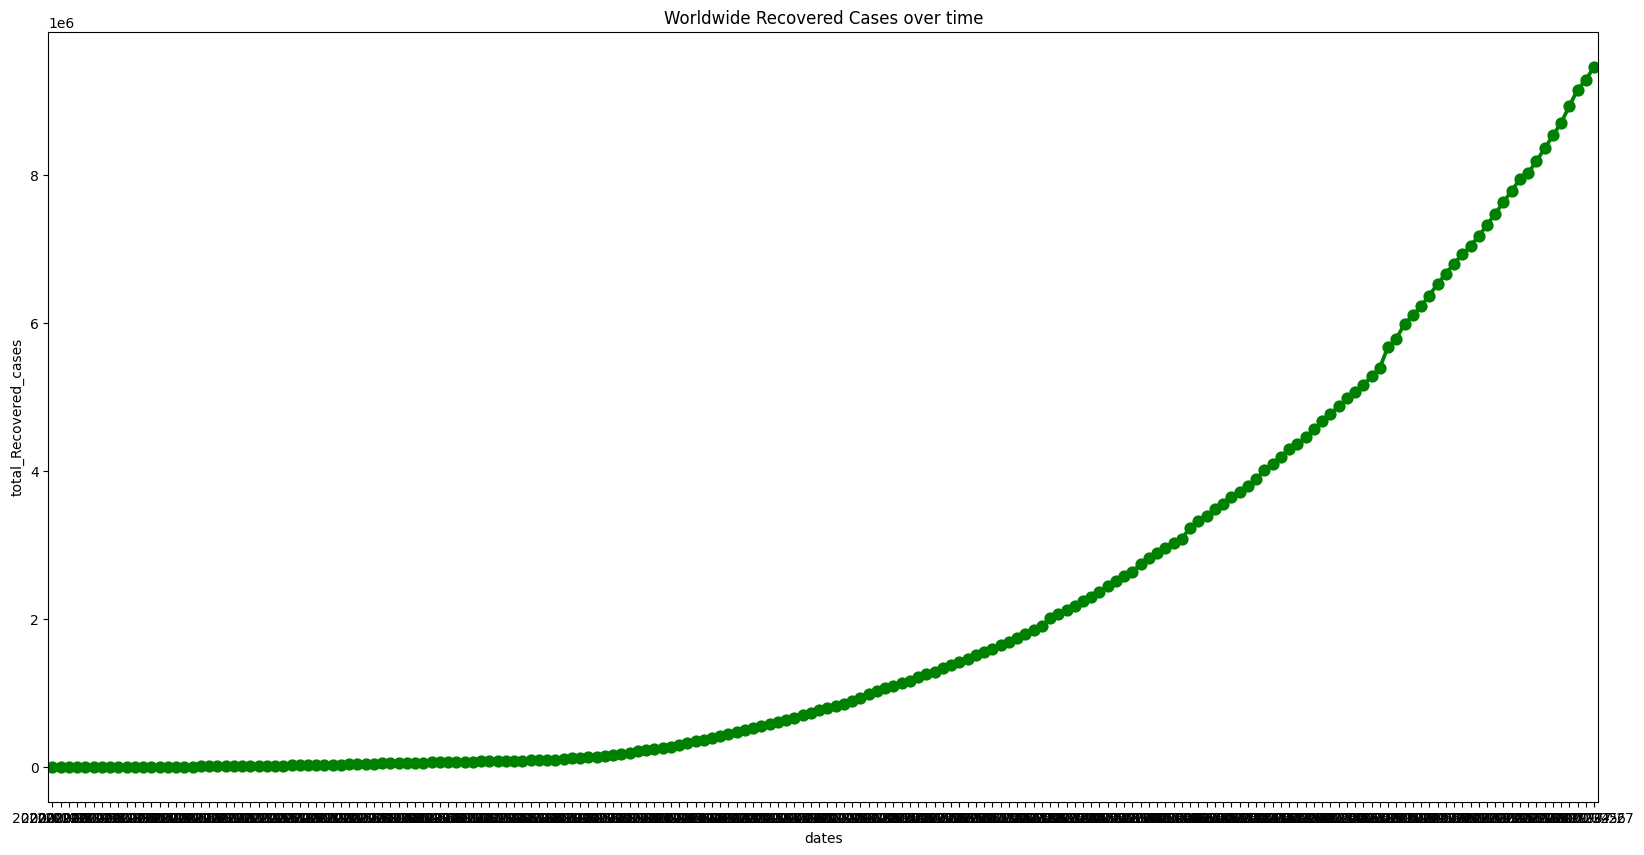

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('dates')
plt.ylabel('total_Recovered_cases')
plt.title('Worldwide Recovered Cases over time')
ax = sns.pointplot(x = total_Recovered_cases.date,y=total_Recovered_cases.Recovered,color='g')

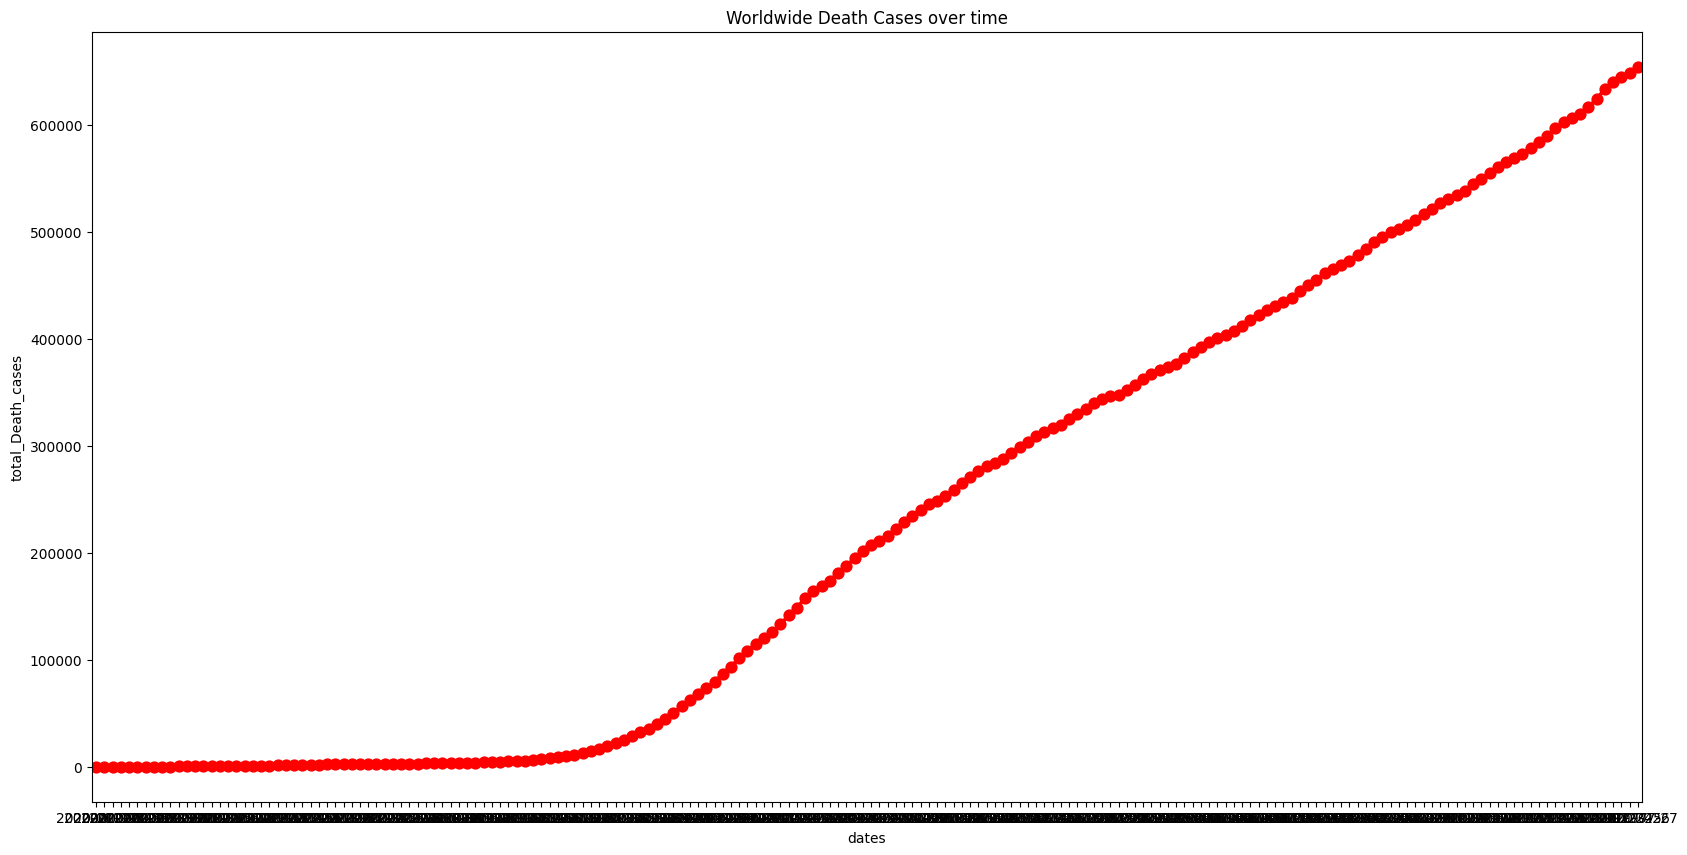

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('dates')
plt.ylabel('total_Death_cases')
plt.title('Worldwide Death Cases over time')
ax = sns.pointplot(x = total_Death_cases.date,y=total_Death_cases.Deaths,color='r')

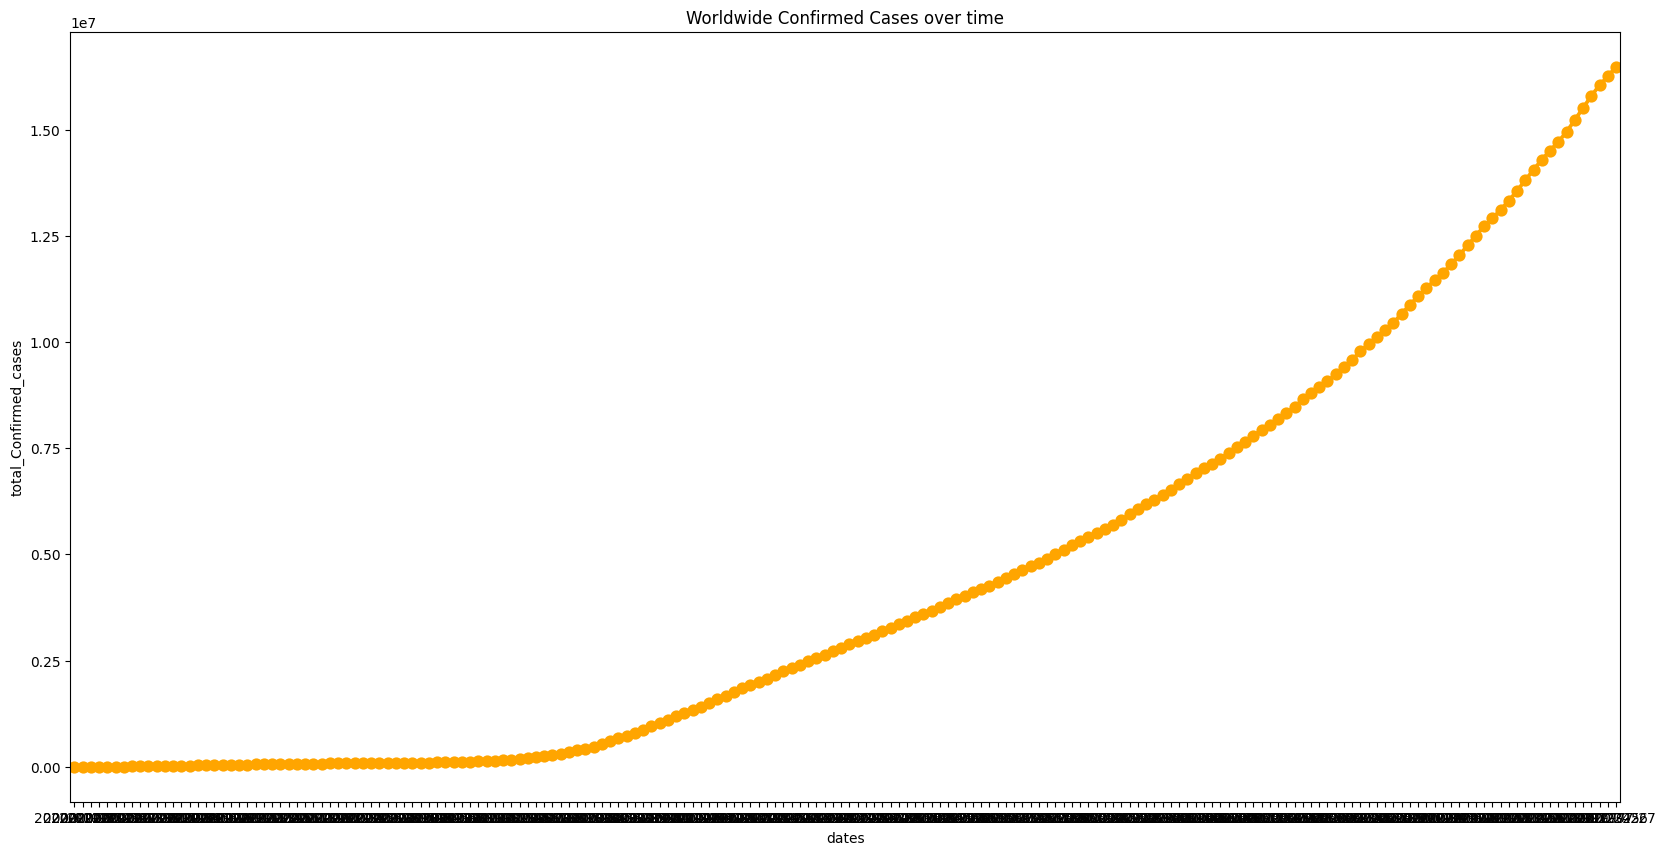

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('dates')
plt.ylabel('total_Confirmed_cases')
plt.title('Worldwide Confirmed Cases over time')
ax = sns.pointplot(x = total_Confirmed_cases.date,y=total_Confirmed_cases.Confirmed,color='Orange')


In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

As we  are doing the forecasting pf No. of cases world wide thus we need to group the data by data column

In [ ]:
Confirmed=df.groupby(['date'])['Confirmed'].sum().reset_index()
Active = df.groupby(['date'])['Active'].sum().reset_index()
Deaths = df.groupby(['date'])['Deaths'].sum().reset_index()
Recovered = df.groupby(['date'])['Recovered'].sum().reset_index()

Confirmed

,date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
#Forecating for the Confirmed cases
Confirmed.rename(columns={'date':'ds','Confirmed':'y'},inplace=True)

In [ ]:
Confirmed

In [ ]:
model = Prophet(interval_width=0.95)
model.fit(Confirmed)

In [ ]:
future = model.make_future_dataframe(periods=7)

In [ ]:
future

In [ ]:
future.tail(7)

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast[['ds','yhat_lower','yhat','yhat_upper']].tail(10)

In [ ]:
confirmed_forecast_plot=model.plot(forecast)

In [ ]:
#Forecating for the Active cases
Active.rename(columns={'date':'ds','Active':'y'},inplace=True)

In [ ]:
Active

In [ ]:
model = Prophet(interval_width=0.95)
model.fit(Active)

In [ ]:
future = model.make_future_dataframe(periods=7)

In [ ]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
future.tail(7)

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast[['ds','yhat_lower','yhat','yhat_upper']].tail(10)

,ds,yhat_lower,yhat,yhat_upper
185,2020-07-25,6.107860e+06,6.175608e+06,6.244853e+06
186,2020-07-26,6.174318e+06,6.242899e+06,6.307858e+06
187,2020-07-27,6.231435e+06,6.296649e+06,6.370150e+06
188,2020-07-28,6.285172e+06,6.353415e+06,6.420185e+06
189,2020-07-29,6.346437e+06,6.415815e+06,6.485277e+06
190,2020-07-30,6.411635e+06,6.481274e+06,6.551374e+06
191,2020-07-31,6.475767e+06,6.549315e+06,6.621569e+06
192,2020-08-01,6.535107e+06,6.611480e+06,6.686637e+06
193,2020-08-02,6.600022e+06,6.678771e+06,6.752099e+06
194,2020-08-03,6.654125e+06,6.732521e+06,6.816416e+06


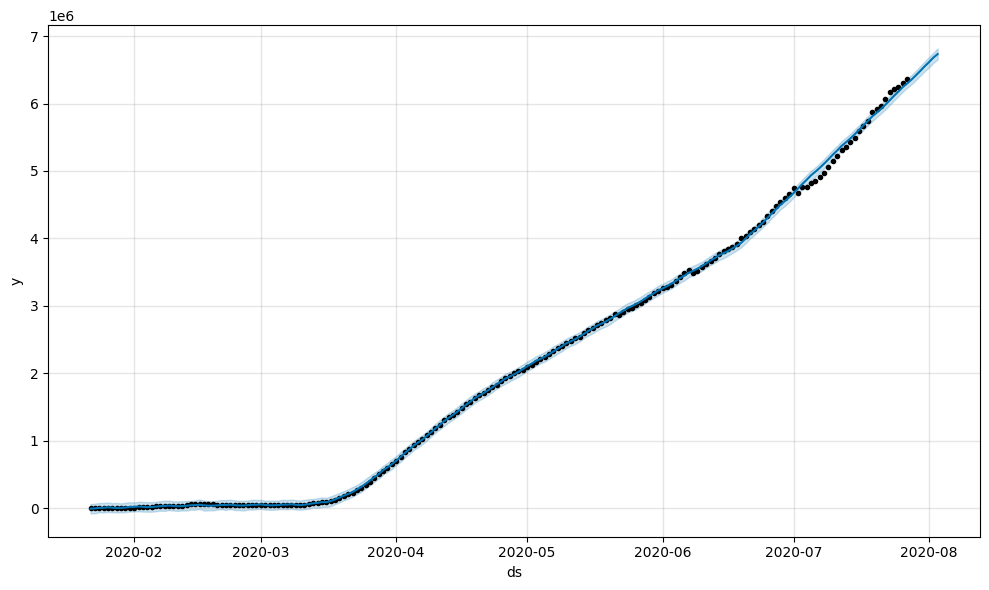

In [ ]:
Active_forecast_plot=model.plot(forecast)

In [ ]:
#Forecating for the Recovered cases
Recovered.rename(columns={'date':'ds','Recovered':'y'},inplace=True)

In [ ]:
Recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
model = Prophet(interval_width=0.95)
model.fit(Recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmo5_wdq0/ce2bgpvg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmo5_wdq0/8629os5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91048', 'data', 'file=/tmp/tmpmo5_wdq0/ce2bgpvg.json', 'init=/tmp/tmpmo5_wdq0/8629os5o.json', 'output', 'file=/tmp/tmpmo5_wdq0/prophet_model9ftn92j4/prophet_model-20250104182257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:22:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:22:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=7)

In [ ]:
future.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast[['ds','yhat_lower','yhat','yhat_upper']].tail(10)

,ds,yhat_lower,yhat,yhat_upper
185,2020-07-25,8.801068e+06,8.921439e+06,9.041374e+06
186,2020-07-26,8.917712e+06,9.047414e+06,9.164960e+06
187,2020-07-27,9.062311e+06,9.183914e+06,9.297523e+06
188,2020-07-28,9.201332e+06,9.311028e+06,9.430019e+06
189,2020-07-29,9.336851e+06,9.453130e+06,9.584027e+06
190,2020-07-30,9.472971e+06,9.595783e+06,9.722691e+06
191,2020-07-31,9.610245e+06,9.737182e+06,9.853253e+06
192,2020-08-01,9.750527e+06,9.877343e+06,1.001099e+07
193,2020-08-02,9.869210e+06,1.000332e+07,1.012476e+07
194,2020-08-03,1.000861e+07,1.013982e+07,1.027410e+07


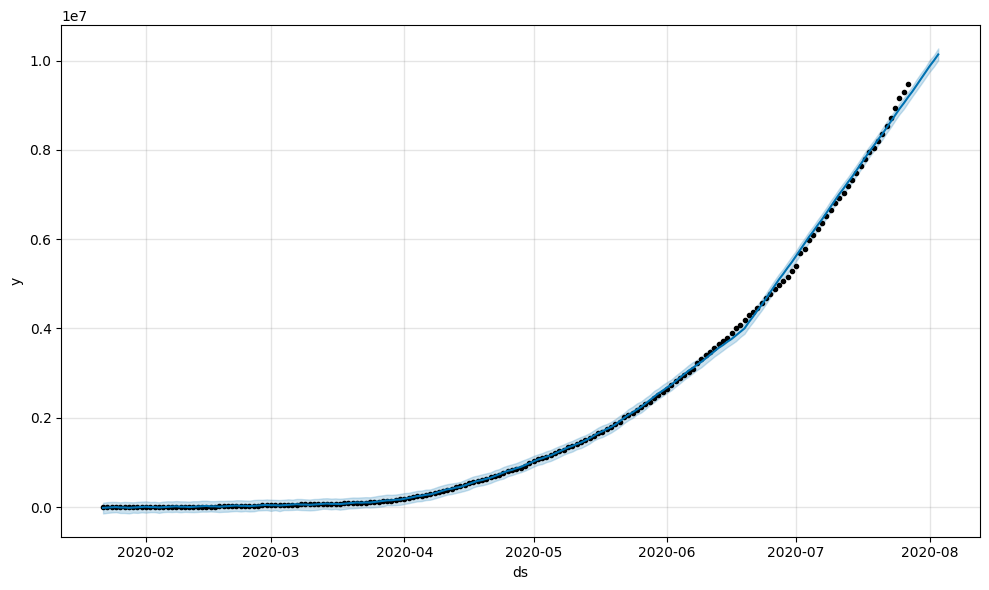

In [ ]:
Recovered_forecast_plot=model.plot(forecast)

In [ ]:
#Forecating for the Deaths cases
Deaths.rename(columns={'date':'ds','Deaths':'y'},inplace=True)

In [ ]:
Deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
model = Prophet(interval_width=0.95)
model.fit(Deaths)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmo5_wdq0/8r7817ie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmo5_wdq0/jt8nkl54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70623', 'data', 'file=/tmp/tmpmo5_wdq0/8r7817ie.json', 'init=/tmp/tmpmo5_wdq0/jt8nkl54.json', 'output', 'file=/tmp/tmpmo5_wdq0/prophet_model2q_5sdbj/prophet_model-20250104183307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=7)

In [ ]:
future.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast[['ds','yhat_lower','yhat','yhat_upper']].tail(10)

,ds,yhat_lower,yhat,yhat_upper
185,2020-07-25,635562.130103,638682.574995,641852.823418
186,2020-07-26,639855.919555,642819.493058,645606.976791
187,2020-07-27,644257.599228,647109.807437,650058.337659
188,2020-07-28,649243.399236,652315.566446,655400.584542
189,2020-07-29,654866.111217,657882.129102,660842.247610
190,2020-07-30,660243.830255,663491.395651,666754.786432
191,2020-07-31,665307.211316,669006.394312,672285.942453
192,2020-08-01,669702.824156,673888.426957,677985.331487
193,2020-08-02,673009.857760,678025.345020,683238.148276
194,2020-08-03,676618.260162,682315.659400,687860.616767


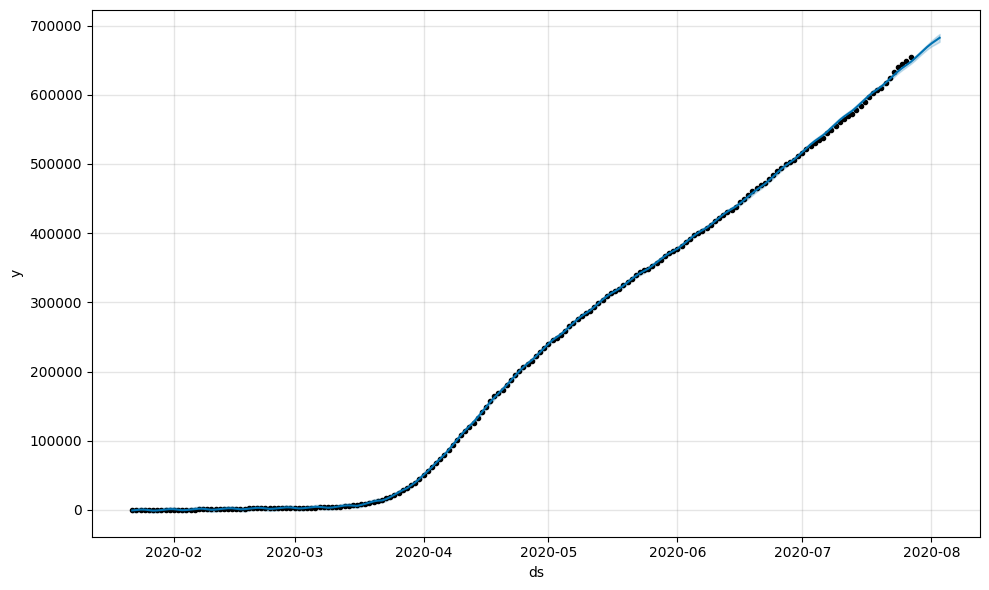

In [ ]:
Deaths_forecast_plot=model.plot(forecast)